In [1]:
import requests
import time

In [2]:
# Reference: https://github.com/dongmeic/BikeCounting/blob/main/BikeShare/GetBikeShareData.ipynb
stationInfoRequest = requests.get('https://peacehealthrides.com/opendata/station_information.json')

In [3]:
stationInfo = stationInfoRequest.json()

In [4]:
stationList = stationInfo.get('data').get('stations')

In [5]:
stationDict = {}
for station in stationList:
    stationDict[station.get('station_id')] = station

In [6]:
# Assemble output in csv format
outList = []
outList.append('station id,name,lon,lat\n') 
for station in stationList:
    stationID = station.get('station_id')
    stationName = stationDict.get(stationID).get('name').replace(",", " @")
    line = stationID + ',' + stationName + ',' + str(stationDict.get(stationID).get('lon')) + ',' + str(stationDict.get(stationID).get('lat')) +'\n'
    outList.append(line)

In [7]:
outFileName = 'BikeStation.csv'
with open(outFileName, 'w') as f:
    for line in outList:
        f.write(line)
f.close()

In [8]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [9]:
df = pd.read_csv(outFileName)

In [10]:
df.head()

,station id,name,lon,lat
0,hub_3828,Eugene Family YMCA,-123.083493,44.037539
1,hub_3829,Monroe St & Blair Blvd,-123.105138,44.051473
2,hub_3830,10th & Olive SE,-123.094081,44.048659
3,hub_3831,16th & Willamette,-123.092931,44.042189
4,hub_3832,13th & Pearl @ Pearl side,-123.089664,44.045263


In [11]:
# Reference: https://gis.stackexchange.com/questions/174159/converting-pandas-dataframe-to-geodataframe
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = df.drop(['lon', 'lat'], axis=1)
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

In [12]:
gdf = gdf.to_crs(epsg=3857)

In [13]:
import matplotlib.pyplot as plt
import contextily as ctx

In [15]:
import geopandas as gpd

In [16]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [20]:
gdf.head()

,station id,name,geometry
0,hub_3828,Eugene Family YMCA,POINT (-13701591.712 5471253.204)
1,hub_3829,Monroe St & Blair Blvd,POINT (-13704001.270 5473411.225)
2,hub_3830,10th & Olive SE,POINT (-13702770.365 5472975.425)
3,hub_3831,16th & Willamette,POINT (-13702642.423 5471973.384)
4,hub_3832,13th & Pearl @ Pearl side,POINT (-13702278.750 5472449.473)


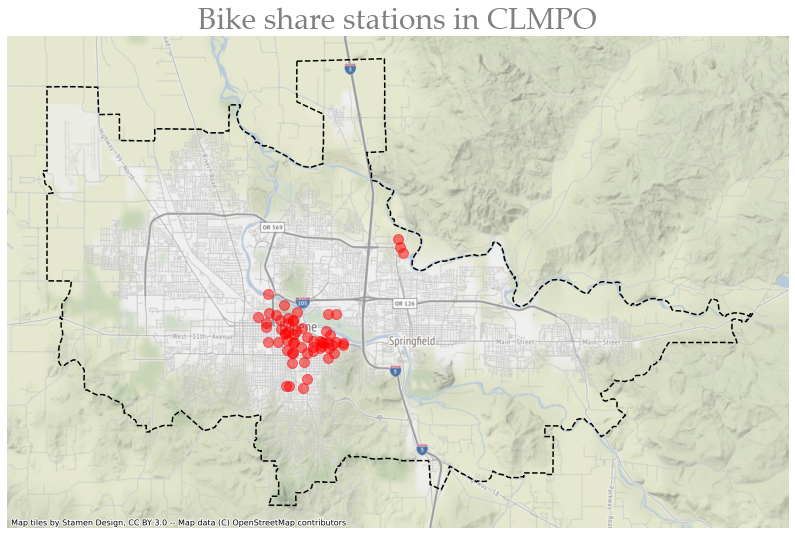

In [22]:
fig, ax = plt.subplots(figsize=(14, 12))
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
gdf.plot(ax=ax, marker='o', markersize=100, color='red', alpha=.5, aspect=1)
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bike share stations in CLMPO", fontsize=30, fontname="Palatino Linotype", 
          color="grey")
ax.axis("off");

In [23]:
gdf.shape

(60, 3)

In [25]:
import os

In [26]:
gdf.to_file(os.path.join(r"T:\DCProjects\StoryMap\BikeCounting\BikeMap", "bike_share_stations.shp"))

In [1]:
# this approach runs in Arcpy; it didn't work due to a lack of spatial info
import json
from urllib.request import urlopen
import arcpy
from arcpy import env
import os

In [2]:
arcpy.env.overwriteOutput = True

In [10]:
# function to convert json from url to features
def json2shp(url_string, json_folder, geodatabase, filename):
    response = urlopen(url_string)
    data = response.read()
    txt_str = data.decode('utf-8')
    lines = txt_str.split("\r\n")
    path = json_folder + '/' + filename + '.json'
    fx = open(path, "w")
    for line in lines:
        fx.write(line+ "\n")
    fx.close()
    arcpy.JSONToFeatures_conversion(path, os.path.join(geodatabase, filename), "Point")

In [4]:
url_string = "https://peacehealthrides.com/opendata/station_information.json"

In [6]:
file_name = "bike_share_station"

In [7]:
geodatabase = r"T:\DCProjects\StoryMap\BikeCounting\BikeMap\ReviewData\ReviewData.gdb"

In [8]:
json_folder = r"T:\DCProjects\StoryMap\BikeCounting\BikeMap"

In [ ]:
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/tool-errors-and-warnings/001001-010000/tool-errors-and-warnings-01551-01575-001558.htm
# not spatial
json2shp(url_string, json_folder, geodatabase, file_name)